In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('C:\\Users\\mohd mustakim\\OneDrive\\Desktop\\data.csv')

In [4]:
df.head()

Unnamed: 0              Id         groupId         matchId  assists  \
0     2093518  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0   
1     3701672  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0   
2     2059784  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0   
3     1302036  b147e1bd448fc4  9a8991656b3fea  d931c0932d8aca        0   
4      297180  d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0   

   boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0       0        25.93      0              0      0         84        1437   
1       0        36.71      0              0      0         57        1225   
2       1        47.73      0              0      0         50           0   
3       0         0.00      0              0      0         56        1286   
4       2       100.00      0              0      3         31           0   

   kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0      0            0        0.000           1403  squad-fpp        31   
1      0            0        0.000           1971  squad-fpp        30   
2      0            0        0.000           1741   solo-fpp        96   
3      0            0        0.000           1738  squad-fpp        28   
4      1            1        7.737           2193       solo        99   

   numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
0         29          -1        0           0.0          0           0.0   
1         30          -1        0           0.0          0           0.0   
2         89        1516        0        4088.0          0           0.0   
3         27          -1        1           0.0          0           0.0   
4         95        1482        0         918.4          0           0.0   

   teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
0          0                0        151.30                1       1525   
1          0                0       1918.00                7       1516   
2          0                0        820.00                7          0   
3          0                0         38.81                0       1515   
4          0                0       1721.00                5          0   

   winPlacePerc  
0        0.0667  
1        0.5862  
2        0.8105  
3        0.5556  
4        0.6429

In [5]:
del df['Unnamed: 0'] #this is unnecessary column

In [6]:
del df['Id']                #Id,groupId,matchId these columns are unnecessary cause they doesnt affect on target variable
del df['groupId']
del df['matchId']

In [13]:
df.loc[df['winPlacePerc'].isna()]

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
184895        0       0          0.0      0              0      0          1   

        killPoints  kills  killStreaks  longestKill  matchDuration matchType  \
184895           0      0            0          0.0              9  solo-fpp   

        maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
184895         1          1        1574        0           0.0          0   

        swimDistance  teamKills  vehicleDestroys  walkDistance  \
184895           0.0          0                0           0.0   

        weaponsAcquired  winPoints  winPlacePerc  
184895                0          0           NaN

In [7]:
df['winPlacePerc'].mean()

0.47278682372965924

In [16]:
df.fillna(df['winPlacePerc'].mean(),inplace=True)

In [9]:
df.shape

(1111742, 26)

In [10]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06   1.111742e+06   
mean   2.336738e-01  1.106655e+00  1.307364e+02  6.573612e-01   2.266488e-01   
std    5.894028e-01  1.716050e+00  1.711755e+02  1.146023e+00   6.033356e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.411000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.859000e+02  1.000000e+00   0.000000e+00   
max    1.700000e+01  2.400000e+01  5.990000e+03  3.500000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06   
mean   1.370348e+00  4.759562e+01  5.044301e+02  9.255097e-01  5.448503e-01   
std    2.683819e+00  2.747025e+01  6.274006e+02  1.562216e+00  7.129032e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.171000e+03  1.000000e+00  1.000000e+00   
max    7.300000e+01  1.000000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  1.111742e+06   1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06   
mean   2.299814e+01   1.579348e+03  4.450584e+01  4.300693e+01  8.927902e+02   
std    5.106977e+01   2.589348e+02  2.381989e+01  2.327841e+01  7.366443e+02   
min    0.000000e+00   9.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.444000e+03   
75%    2.133000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.040000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06  1.111742e+06   
mean   1.641784e-01  6.042142e+02  3.551184e-03  4.545068e+00  2.401097e-02   
std    4.704189e-01  1.495949e+03  7.385452e-02  3.061857e+01  1.678909e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  7.927500e-02  0.000000e+00  0.000000e+00  0.000000e+00   
max    2.300000e+01  3.540000e+04  1.400000e+01  2.668000e+03  1.000000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     1.111742e+06  1.111742e+06     1.111742e+06  1.111742e+06   
mean      7.833652e-03  1.153282e+03     3.659685e+00  6.057065e+02   
std       9.194621e-02  1.182788e+03     2.461805e+00  7.395140e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.552000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.841000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.975000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  1.396000e+04     1.770000e+02  2.002000e+03   

       winPlacePerc  
count  1.111741e+06  
mean   4.727868e-01  
std    3.073771e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  object 
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  int64  
 16  revives          1

In [17]:
df.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [73]:
df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [99]:
df.head()

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0        25.93      0              0      0         84   
1        0       0        36.71      0              0      0         57   
2        0       1        47.73      0              0      0         50   
3        0       0         0.00      0              0      0         56   
4        0       2       100.00      0              0      3         31   

   killPoints  kills  killStreaks  longestKill  matchDuration  matchType  \
0        1437      0            0        0.000           1403  squad-fpp   
1        1225      0            0        0.000           1971  squad-fpp   
2           0      0            0        0.000           1741   solo-fpp   
3        1286      0            0        0.000           1738  squad-fpp   
4           0      1            1        7.737           2193       solo   

   maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0        31         29          -1        0           0.0          0   
1        30         30          -1        0           0.0          0   
2        96         89        1516        0        4088.0          0   
3        28         27          -1        1           0.0          0   
4        99         95        1482        0         918.4          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0        151.30                1   
1           0.0          0                0       1918.00                7   
2           0.0          0                0        820.00                7   
3           0.0          0                0         38.81                0   
4           0.0          0                0       1721.00                5   

   winPoints  winPlacePerc  
0       1525        0.0667  
1       1516        0.5862  
2          0        0.8105  
3       1515        0.5556  
4          0        0.6429

# Univariate Analysis

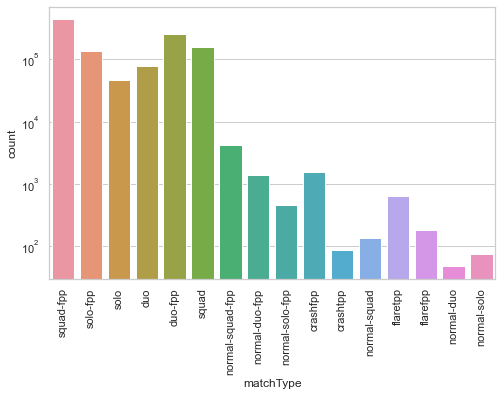

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['matchType'],log=True)
plt.xticks(rotation=90)
plt.show()

***description*** match type **squad-fpp** has more matches

In [106]:
df.head(2)

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0        25.93      0              0      0         84   
1        0       0        36.71      0              0      0         57   

   killPoints  kills  killStreaks  longestKill  matchDuration  matchType  \
0        1437      0            0          0.0           1403  squad-fpp   
1        1225      0            0          0.0           1971  squad-fpp   

   maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0        31         29          -1        0           0.0          0   
1        30         30          -1        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         151.3                1   
1           0.0          0                0        1918.0                7   

   winPoints  winPlacePerc  
0       1525        0.0667  
1       1516        0.5862

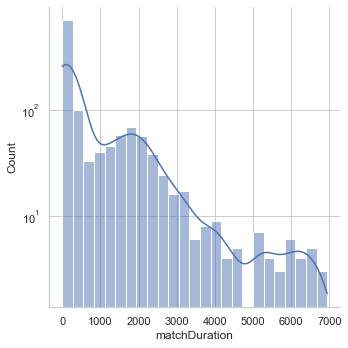

In [120]:
sns.displot(df['matchDuration'].value_counts(),kind='hist',log=True,kde=True)

In [109]:
df['kills'].sum()

1028928

<AxesSubplot:xlabel='matchType'>

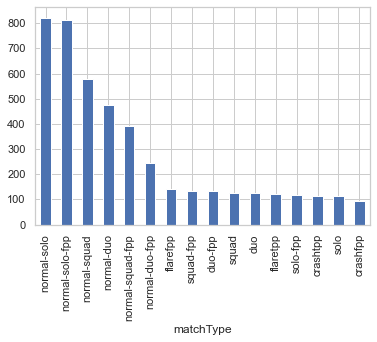

In [45]:
df.groupby(by=df['matchType'])['damageDealt'].mean().sort_values(ascending=False).plot(kind='bar')

***description*** match type **normal solo** has more **damaged dealt**

<AxesSubplot:xlabel='damageDealt'>

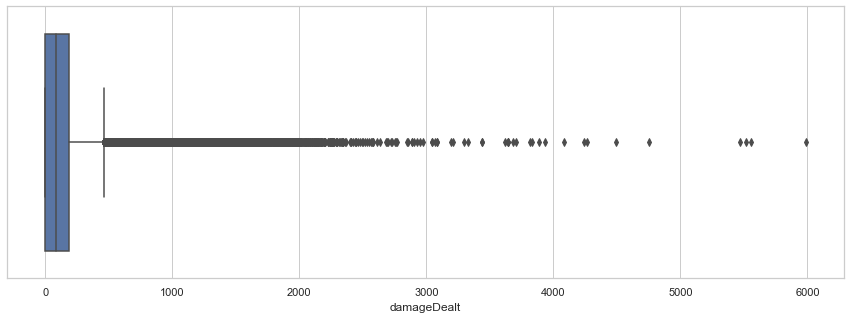

In [104]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['damageDealt'])

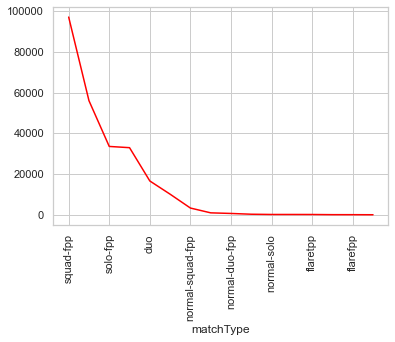

In [32]:
df.groupby(by=df['matchType'])['headshotKills'].sum().sort_values(ascending=False).plot(kind='line',color='red')
plt.xticks(rotation=90)
plt.show()

***description*** match type **normal-solo-fpp** has more **headshotKills**

Text(0.5, 0, 'matchType')

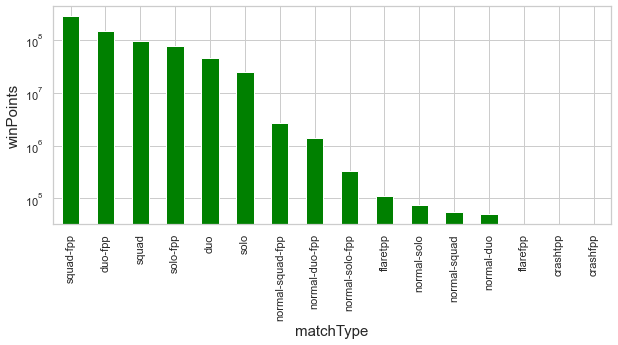

In [37]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['winPoints'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('winPoints',size=15)
plt.xlabel('matchType',size=15)

***description*** matchtype **squad-fpp** has more winpoints

Text(0.5, 0, 'matchType')

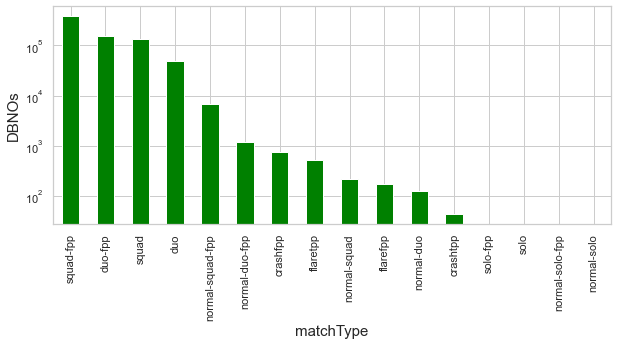

In [36]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['DBNOs'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('DBNOs',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **squad-fpp** has more **DBNOs**

Text(0.5, 0, 'matchType')

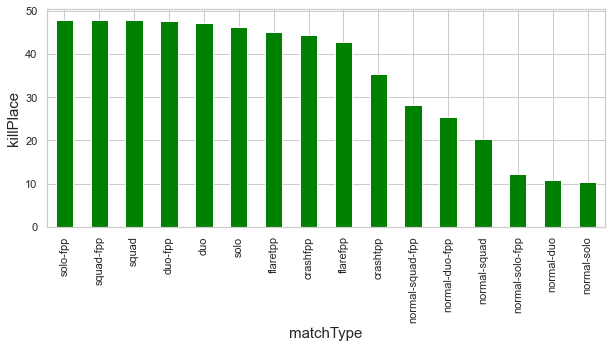

In [75]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['killPlace'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('killPlace',size=15)
plt.xlabel('matchType',size=15)


***description*** match type **normal-solo** has less **killPlace**

In [26]:
df.head(10)

Unnamed: 0              Id         groupId         matchId  assists  \
0     2093518  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0   
1     3701672  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0   
2     2059784  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0   
3     1302036  b147e1bd448fc4  9a8991656b3fea  d931c0932d8aca        0   
4      297180  d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0   
5     2862125  e705cb7a4446ea  9d7180a567d020  b146588581df18        0   
6      365937  e253262031e08f  e5df2dcdaf3f4b  c1385ae84655e6        0   
7     3651102  c264a5ce0d4ca1  0efbbf391d7f62  b280791eb7a3fd        0   
8     2363197  342437cd2b5680  7acbacbed1b711  99cbf12f555f61        0   
9      271498  3cf3cc81325a37  537c4bd393dcff  38a8b94623d77d        2   

   boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0       0        25.93      0              0      0         84        1437   
1       0        36.71      0              0      0         57        1225   
2       1        47.73      0              0      0         50           0   
3       0         0.00      0              0      0         56        1286   
4       2       100.00      0              0      3         31           0   
5       0         0.00      0              0      0         59           0   
6       0         0.00      0              0      0         81           0   
7       8       170.20      0              0      1         25           0   
8       2       338.70      2              0     15          6           0   
9       1       230.80      2              0      1          8           0   

   kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0      0            0        0.000           1403  squad-fpp        31   
1      0            0        0.000           1971  squad-fpp        30   
2      0            0        0.000           1741   solo-fpp        96   
3      0            0        0.000           1738  squad-fpp        28   
4      1            1        7.737           2193       solo        99   
5      0            0        0.000           1358   solo-fpp        94   
6      0            0        0.000           1497   solo-fpp        99   
7      1            1       32.960           1968   solo-fpp        97   
8      4            2       14.230           1989        duo        47   
9      3            2      174.500           1373  squad-fpp        32   

   numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
0         29          -1        0           0.0          0           0.0   
1         30          -1        0           0.0          0           0.0   
2         89        1516        0        4088.0          0           0.0   
3         27          -1        1           0.0          0           0.0   
4         95        1482        0         918.4          0           0.0   
5         90        1503        0           0.0          0           0.0   
6         98        1464        0           0.0          0           0.0   
7         94        1544        0           0.0          0         221.0   
8         45        1492        1        3349.0          0           0.0   
9         30        1449        0           0.0          0           0.0   

   teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
0          0                0        151.30                1       1525   
1          0                0       1918.00                7       1516   
2          0                0        820.00                7          0   
3          0                0         38.81                0       1515   
4          0                0       1721.00                5          0   
5          0                0        446.00                3          0   
6          0                0         45.86                1          0   
7          0                0       3297.00                5          0   
8 

<AxesSubplot:xlabel='killPoints'>

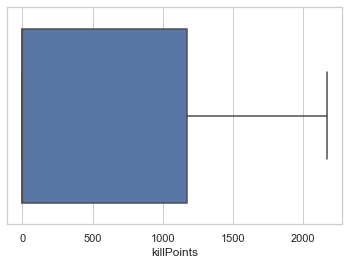

In [24]:
sns.boxplot(x=df['killPoints'])

Text(0.5, 0, 'matchType')

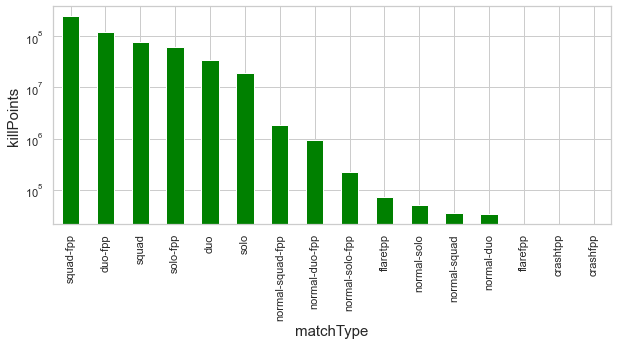

In [40]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['killPoints'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('killPoints',size=15)
plt.xlabel('matchType',size=15)


Text(0.5, 0, 'matchType')

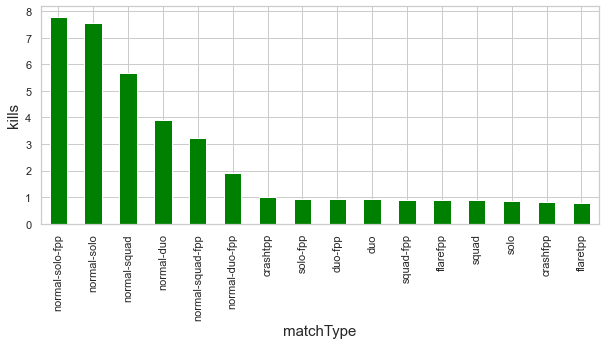

In [74]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['kills'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('kills',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

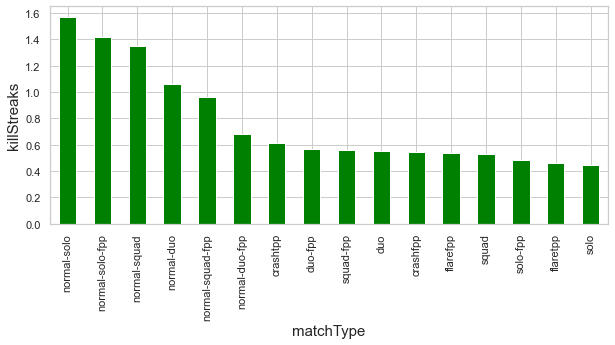

In [93]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['killStreaks'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('killStreaks',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **normal-solo** has more **killStreaks**

Text(0.5, 0, 'matchType')

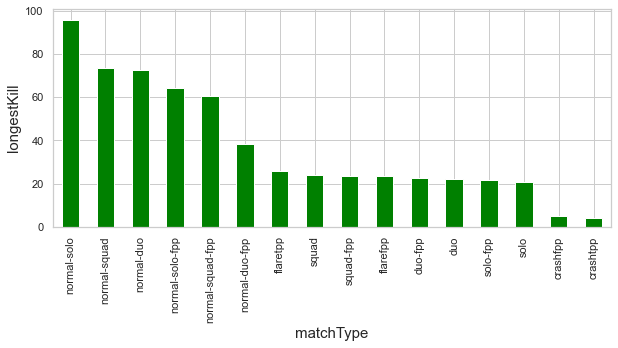

In [94]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['longestKill'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('longestKill',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **normal-solo** has more **longestKill**

<AxesSubplot:xlabel='matchDuration'>

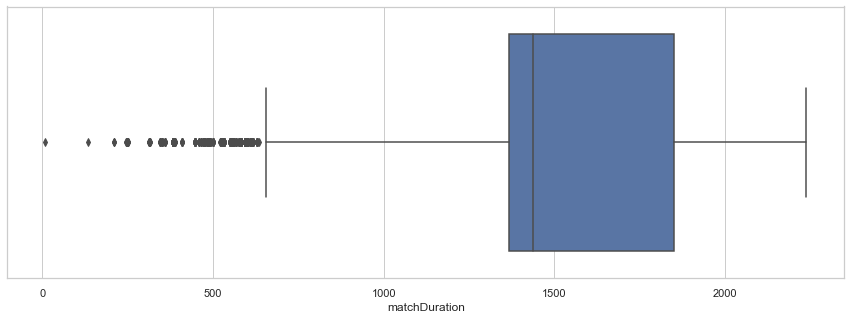

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['matchDuration'])

Text(0.5, 0, 'matchType')

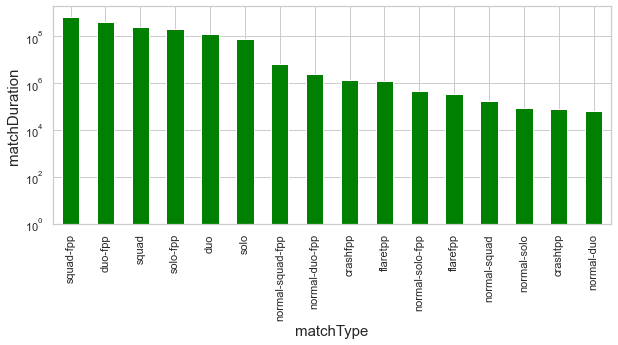

In [23]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['matchDuration'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('matchDuration',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **flarefpp** has more **match duration**

Text(0.5, 0, 'matchType')

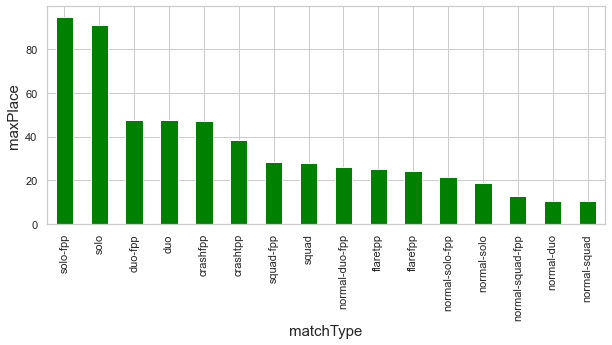

In [103]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['maxPlace'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('maxPlace',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **solo-fpp** has more **maxPlace**

Text(0.5, 0, 'matchType')

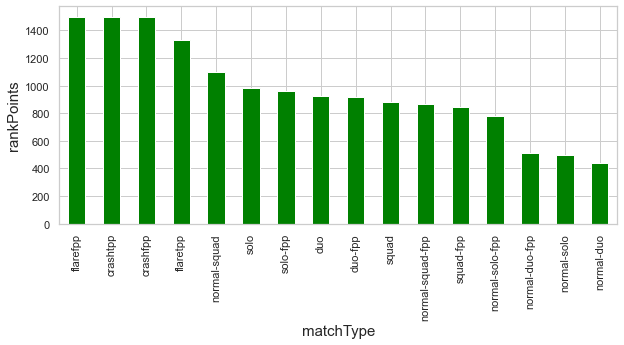

In [104]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['rankPoints'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('rankPoints',size=15)
plt.xlabel('matchType',size=15)

***description*** match type **flarefpp** has more **rankpoints**

Text(0.5, 0, 'matchType')

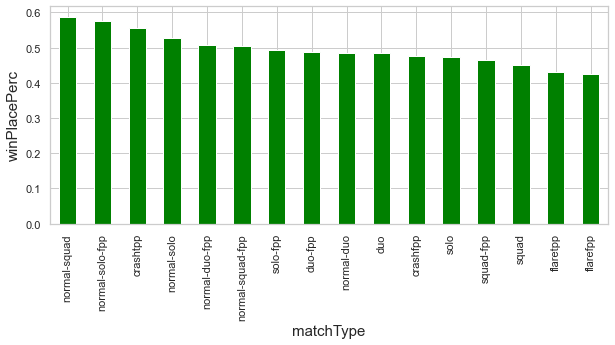

In [105]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['winPlacePerc'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.ylabel('winPlacePerc',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

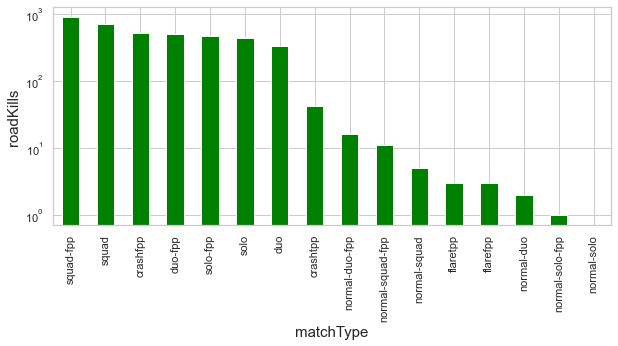

In [115]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['roadKills'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('roadKills',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

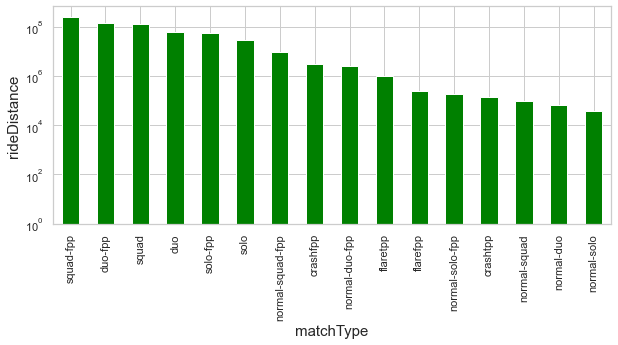

In [118]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['rideDistance'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('rideDistance',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

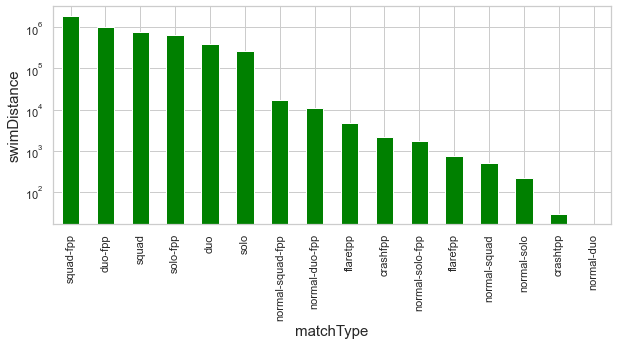

In [119]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['swimDistance'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('swimDistance',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

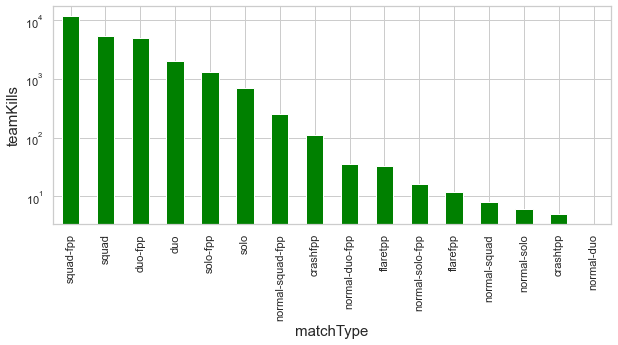

In [121]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['teamKills'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('teamKills',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

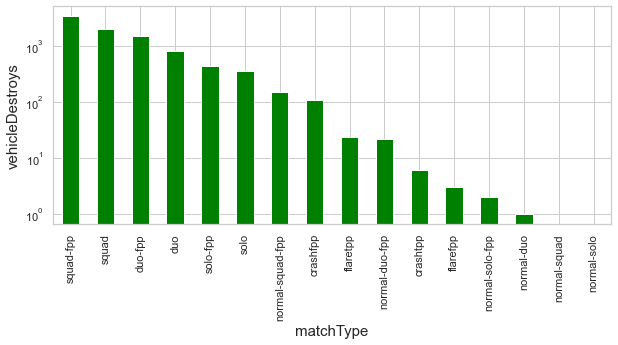

In [126]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['vehicleDestroys'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('vehicleDestroys',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

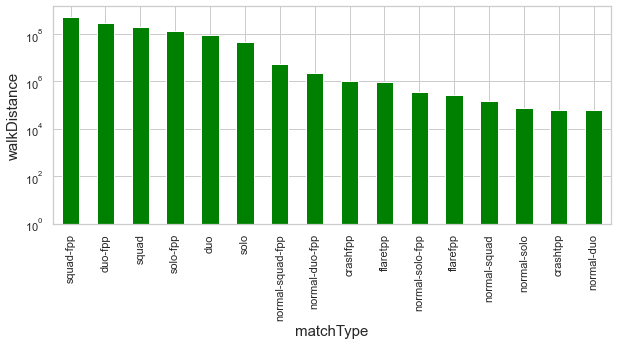

In [129]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['walkDistance'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('walkDistance',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

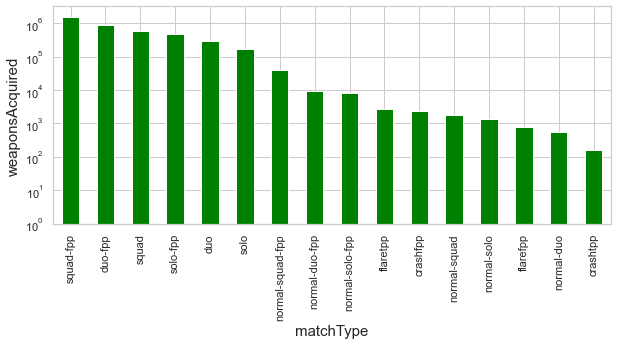

In [130]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['weaponsAcquired'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('weaponsAcquired',size=15)
plt.xlabel('matchType',size=15)

Text(0.5, 0, 'matchType')

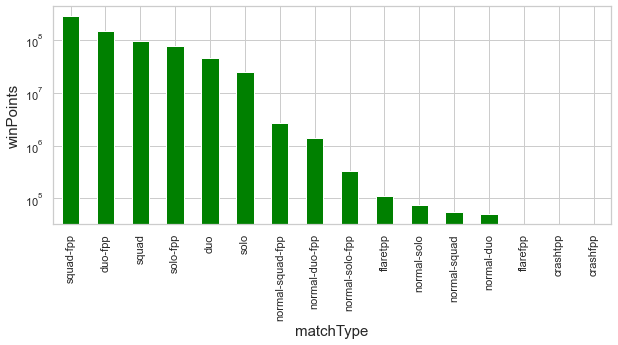

In [131]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['winPoints'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('winPoints',size=15)
plt.xlabel('matchType',size=15)

In [1]:
import plotly.graph_objects as go

Text(0.5, 0, 'matchType')

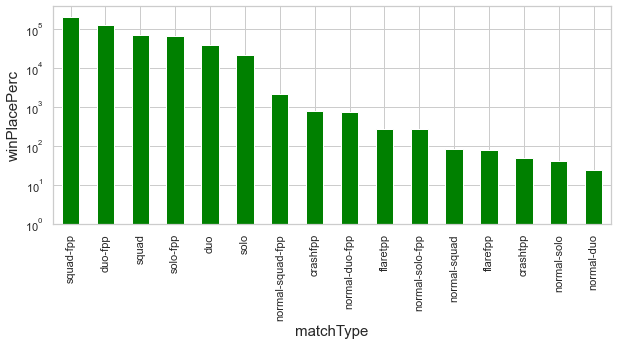

In [132]:
plt.figure(figsize=(10,4))
df.groupby(by=df['matchType'])['winPlacePerc'].sum().sort_values(ascending=False).plot(kind='bar',color='green',log=True)
plt.ylabel('winPlacePerc',size=15)
plt.xlabel('matchType',size=15)

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills', ylabel='damageDealt'>

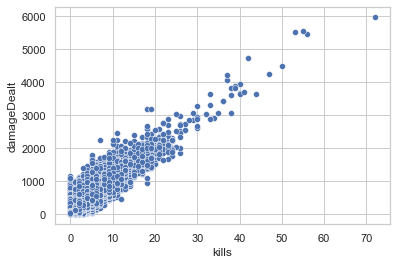

In [35]:
sns.scatterplot(df['kills'],df['damageDealt'])

***description:*** here when kill & damageDealt both increase linearly and vice versa

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='assists', ylabel='boosts'>

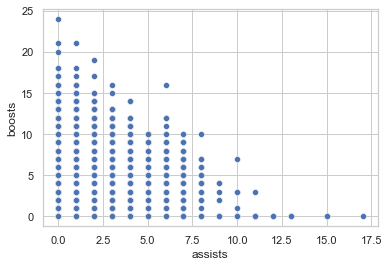

In [50]:
sns.scatterplot(df['assists'],df['boosts'])

<AxesSubplot:xlabel='killPoints', ylabel='winPoints'>

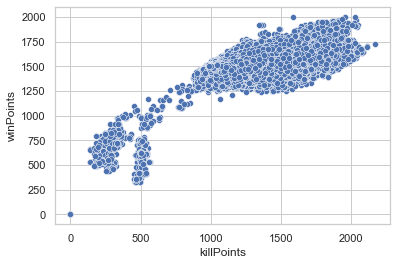

In [80]:
sns.scatterplot(x=df['killPoints'],y=df['winPoints'])

<AxesSubplot:>

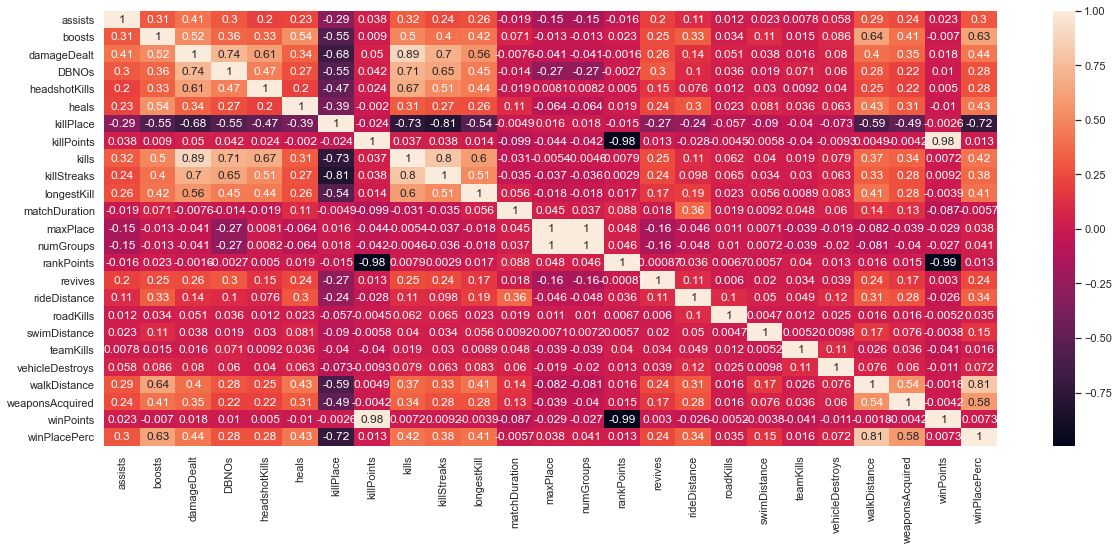

In [126]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

***conclusion***
if value is lying between **0.6 to 1.0** that means relation is **+ve**
and if the value is lying between **-0.6 to -1.0** then it is **-ve** corelated

In [129]:
df.head(2)

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0        25.93      0              0      0         84   
1        0       0        36.71      0              0      0         57   

   killPoints  kills  killStreaks  longestKill  matchDuration  matchType  \
0        1437      0            0          0.0           1403  squad-fpp   
1        1225      0            0          0.0           1971  squad-fpp   

   maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0        31         29          -1        0           0.0          0   
1        30         30          -1        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         151.3                1   
1           0.0          0                0        1918.0                7   

   winPoints  winPlacePerc  
0       1525        0.0667  
1       1516        0.5862

In [ ]:
sns.pairplot(df)